# Exploring Spatiotemporal Segregation Dynamics

In [1]:
%load_ext watermark
%watermark -v -a "author: eli knaap" -d -u -p segregation,libpysal,geopandas,geosnap

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Author: author: eli knaap

Last updated: 2022-06-20

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0

segregation: 2.3.1
libpysal   : 4.6.2
geopandas  : 0.10.2
geosnap    : 0.10.0



In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import hvplot.pandas

from segregation import singlegroup, multigroup, dynamics, batch
from geosnap import datasets, Community
from geosnap.analyze import segdyn

c:\Users\moeth\anaconda3\envs\GeospatialPython\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\moeth\anaconda3\envs\GeospatialPython\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\moeth\anaconda3\envs\Geo

ImportError: cannot import name 'datasets' from 'geosnap' (c:\Users\moeth\anaconda3\envs\GeospatialPython\lib\site-packages\geosnap\__init__.py)

In [ ]:
from geosnap.visualize import plot_timeseries

In [ ]:
dc = gpd.read_parquet("data/dc_income.parquet")

In [ ]:
dc.head()

geoid                                           geometry  \
0  110010010022  MULTIPOLYGON (((319901.558 4312052.717, 319906...   
1  110010010022  MULTIPOLYGON (((319901.558 4312052.717, 319906...   
2  110010010022  MULTIPOLYGON (((319901.558 4312052.717, 319906...   
3  110010010022  MULTIPOLYGON (((319901.558 4312052.717, 319906...   
4  110010010022  MULTIPOLYGON (((319901.558 4312052.717, 319906...   

   very_low_inc  low_inc  med_inc  high_inc  very_high_inc  \
0          28.0    112.0     92.0     261.0          282.0   
1          36.0    134.0     58.0     204.0          288.0   
2          23.0    186.0     65.0     166.0          355.0   
3          22.0    223.0     75.0     226.0          299.0   
4          21.0    200.0     51.0     190.0          424.0   

   share_very_low_inc  share_low_inc  share_med_inc  share_high_inc  \
0            0.036129       0.144516       0.118710        0.336774   
1            0.050000       0.186111       0.080556        0.283333   
2            0.028931       0.233962       0.081761        0.208805   
3            0.026036       0.263905       0.088757        0.267456   
4            0.023702       0.225734       0.057562        0.214447   

   share_very_high_inc  total  year  
0             0.363871  775.0  2012  
1             0.400000  720.0  2013  
2             0.446541  795.0  2014  
3             0.353846  845.0  2015  
4             0.478555  886.0  2016

In [ ]:
from IPython.display import IFrame

## Income Segregation over Time

SubplotGrid(nrows=2, ncols=4, length=8)

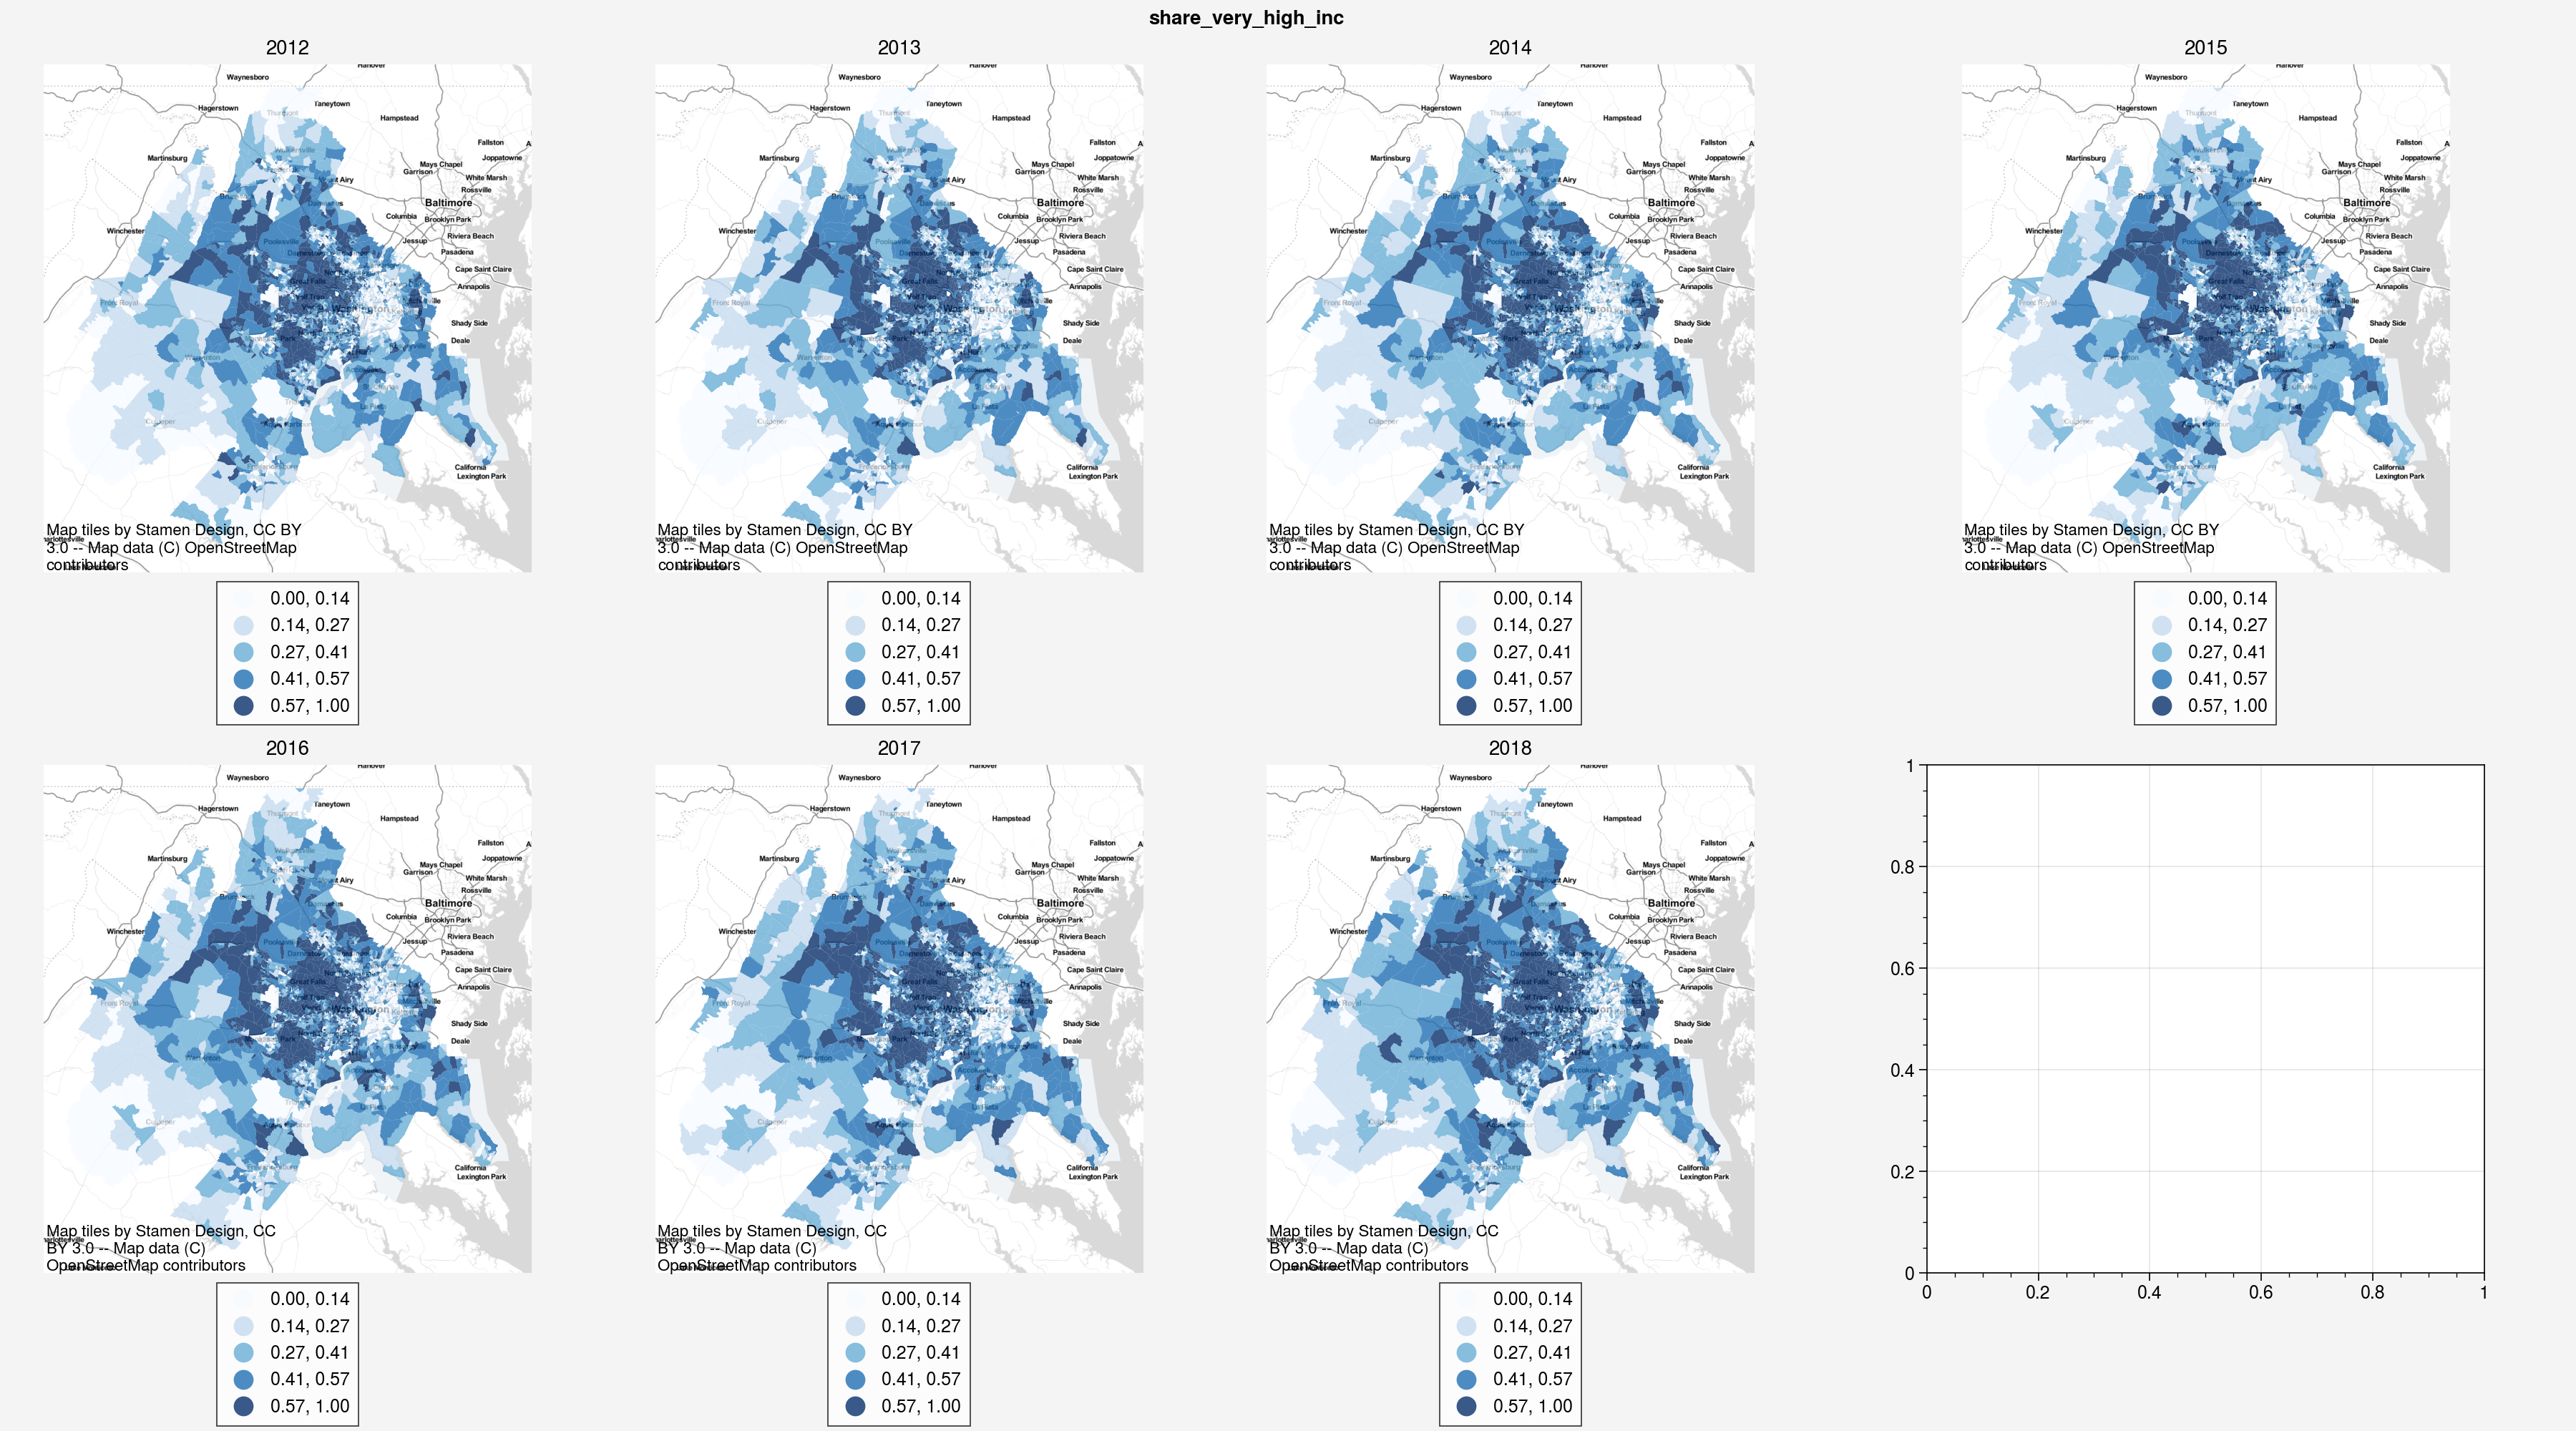

In [ ]:
plot_timeseries(dc, 'share_very_high_inc', nrows=2, ncols=4, figsize=(18,10), cmap='Blues', alpha=0.8)

### Temporal Dynamics

#### Multi-Group Indices

In [ ]:
cols = ['very_low_inc', 'low_inc', 'med_inc', 'high_inc', 'very_high_inc']

In [ ]:
multi_by_time = segdyn.multigroup_tempdyn(dc, cols)

In [ ]:
multi_by_time

year                       2012     2013     2014     2015     2016     2017  \
Name                                                                           
GlobalDistortion        38.7812  38.2548  36.9974  35.8396  34.4924  32.7230   
MultiDissim              0.3231   0.3206   0.3180   0.3163   0.3136   0.3127   
MultiDivergence          0.2097   0.2056   0.2008   0.1981   0.1923   0.1887   
MultiDiversity           1.5325   1.5286   1.5245   1.5219   1.5155   1.5006   
MultiGini                0.4465   0.4438   0.4402   0.4378   0.4336   0.4327   
MultiInfoTheory          0.1368   0.1345   0.1317   0.1302   0.1269   0.1257   
MultiNormExposure        0.1182   0.1175   0.1161   0.1153   0.1138   0.1145   
MultiRelativeDiversity   0.1136   0.1125   0.1107   0.1098   0.1079   0.1077   
MultiSquaredCoefVar      0.1038   0.1019   0.0991   0.0982   0.0956   0.0942   
SimpsonsConcentration    0.2320   0.2340   0.2359   0.2371   0.2402   0.2470   
SimpsonsInteraction      0.7680   0.7660   0.7641   0.7629   0.7598   0.7530   

year                       2018  
Name                             
GlobalDistortion        31.2007  
MultiDissim              0.3142  
MultiDivergence          0.1858  
MultiDiversity           1.4819  
MultiGini                0.4345  
MultiInfoTheory          0.1253  
MultiNormExposure        0.1168  
MultiRelativeDiversity   0.1085  
MultiSquaredCoefVar      0.0924  
SimpsonsConcentration    0.2559  
SimpsonsInteraction      0.7441

<AxesSubplot:xlabel='year'>

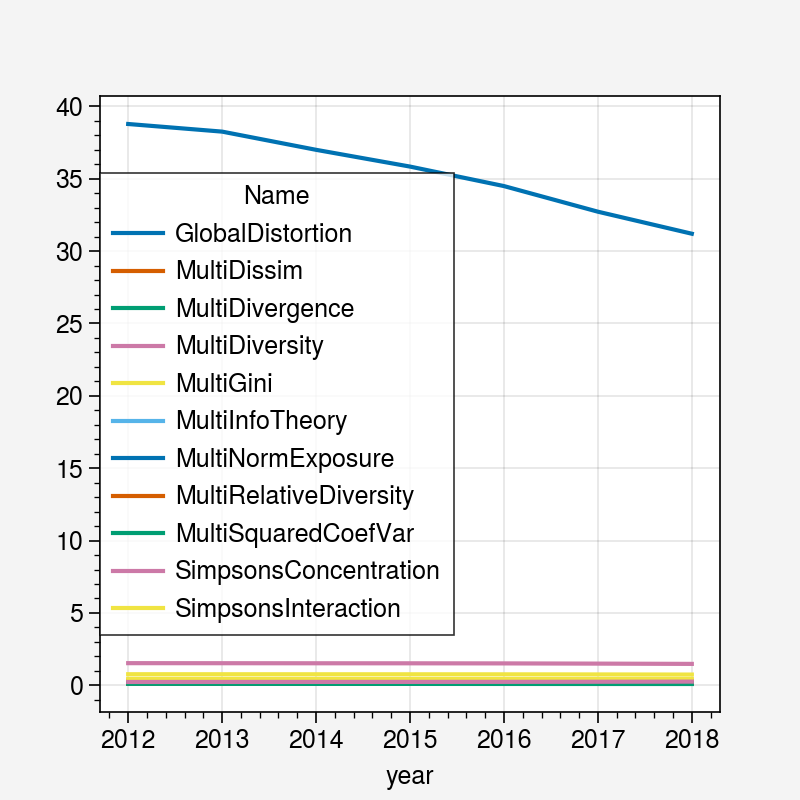

In [ ]:
multi_by_time.T.plot()

<AxesSubplot:xlabel='year'>

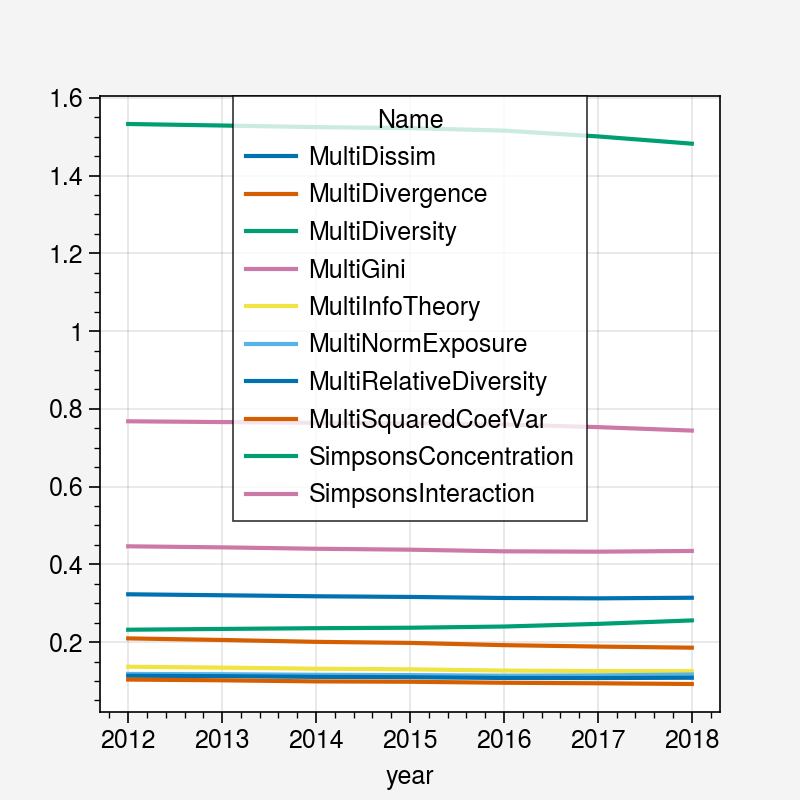

In [ ]:
# removing the GlobalDistortion coef lets us see what's happening with the rest of the indices
multi_by_time.iloc[1:].T.plot()

Most indices are decreasing slightly over time

Text(0.5, 0.98, 'Multigroup Dissimilarity')

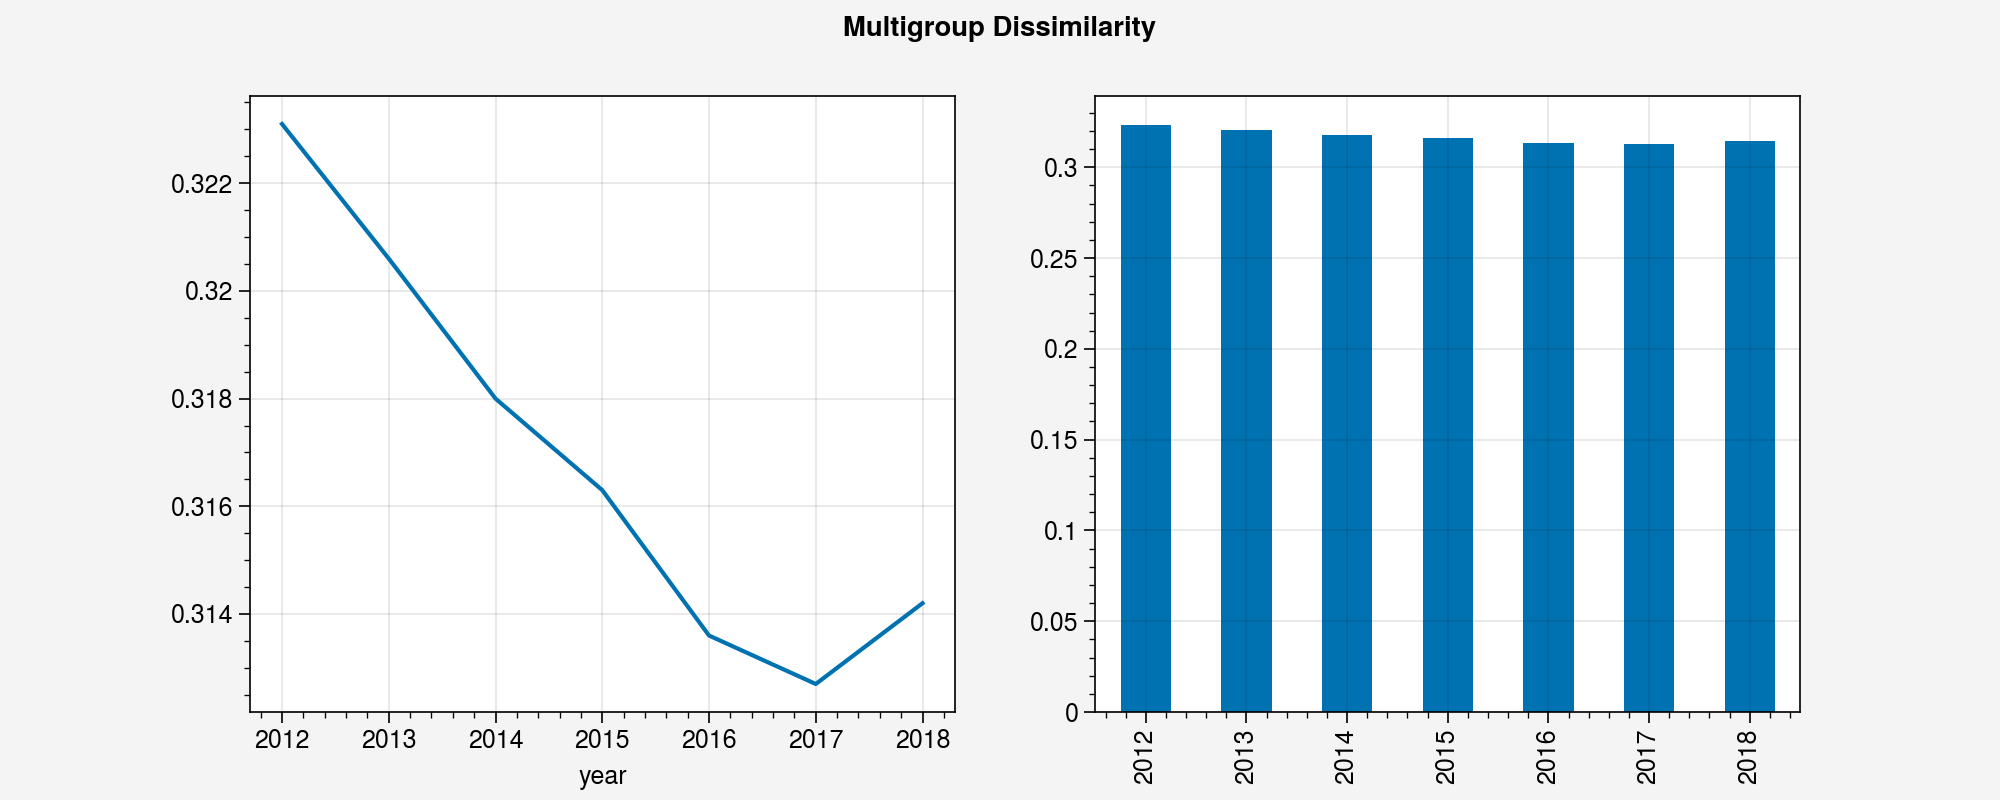

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

multi_by_time.loc['MultiDissim'].plot(ax=axs[0])
multi_by_time.loc['MultiDissim'].plot(kind='bar', ax=axs[1])

fig.suptitle("Multigroup Dissimilarity")

One that **isn't**, is SimpsonsConcentration, which is increasing over time. Another index that bucks the trend is SimpsonsInteraction, which is decreasing over time (corresponding with an increse in segregation). The divergence between indices tells us that segregation may be changing in different ways across its different dimensions.

Text(0.5, 0.98, "Simpson's Concentration")

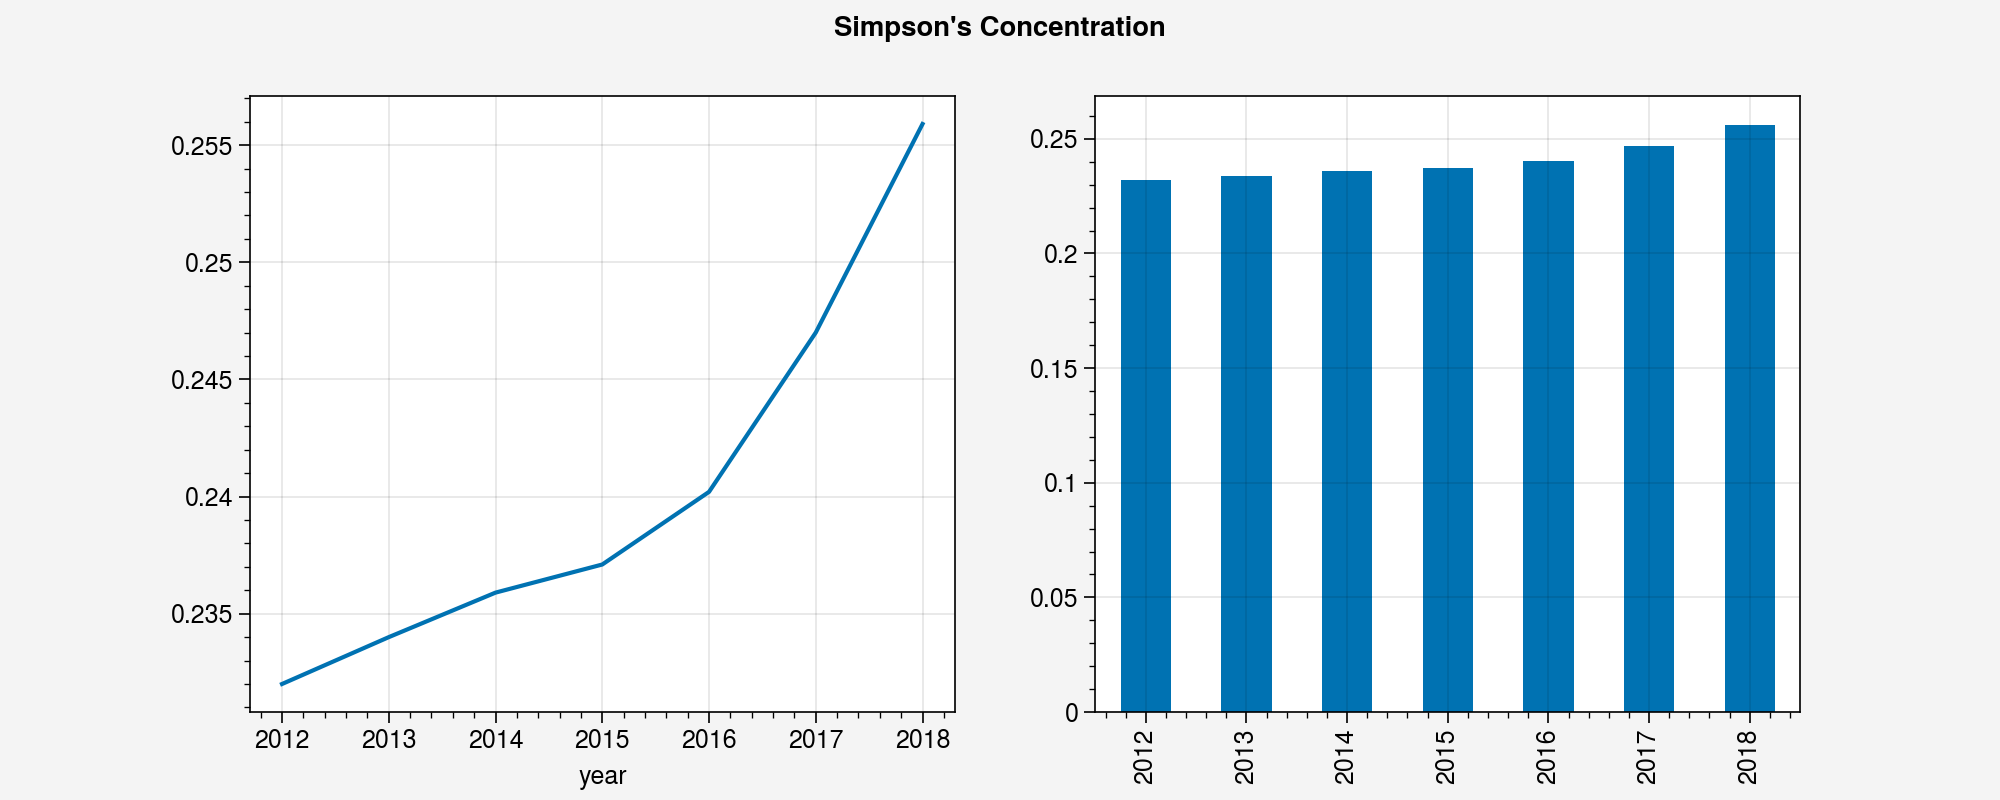

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

multi_by_time.loc['SimpsonsConcentration'].plot(ax=axs[0])
multi_by_time.loc['SimpsonsConcentration'].plot(kind='bar', ax=axs[1])

fig.suptitle("Simpson's Concentration")

#### Single-Group Indices

In [ ]:
from geosnap.analyze.segdyn import singlegroup_tempdyn

In [ ]:
singlegroup_tempdyn?

Signature:
singlegroup_tempdyn(
    gdf,
    group_pop_var=None,
    total_pop_var=None,
    time_index='year',
    n_jobs=-1,
    backend='loky',
    **index_kwargs,
)
Docstring:
Batch compute singlegroup segregation indices for each time period in parallel.

Parameters
----------
gdf : geopandas.GeoDataFrame
    geodataframe formatted as a long-form timeseries
group_pop_var : str
    name of column on gdf containing population counts for the group of interest
total_pop_var : str
    name of column on gdf containing total population counts for the unit
time_index : str
    column on the dataframe that denotes unique time periods, by default "year"
n_jobs : int, optional
    number of cores to use for computation. If -1, all available cores will be
    used, by default -1
backend : str, optional
    computation backend passed to joblib. One of {'multiprocessing', 'loky',
    'threading'}, by default "loky"

Returns
-------
geopandas.GeoDataFrame
    dataframe with unique segregation in

In [ ]:
segs_single = segdyn.singlegroup_tempdyn(dc, group_pop_var='very_high_inc', total_pop_var='total', )

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
SpatialProximity: 100%|██████████| 27/27 [01:04<00:00,  2.40s/it]


In [ ]:
segs_single

year                        2012    2013    2014    2015    2016    2017  \
Name                                                                       
AbsoluteCentralization    0.6979  0.6973  0.6967  0.6972  0.6953  0.6923   
AbsoluteClustering        0.1258  0.1274  0.1308  0.1324  0.1346  0.1412   
AbsoluteConcentration     0.6550  0.6497  0.6414  0.6404  0.6265  0.6087   
Atkinson                  0.2569  0.2521  0.2479  0.2445  0.2362  0.2297   
BiasCorrectedDissim       0.3977  0.3936  0.3909  0.3878  0.3840  0.3791   
BoundarySpatialDissim     0.2470  0.2424  0.2417  0.2385  0.2355  0.2288   
ConProf                   0.2956  0.2944  0.2948  0.2920  0.2950  0.2988   
CorrelationR              0.2040  0.2020  0.2003  0.1980  0.1946  0.1929   
Delta                     0.6851  0.6849  0.6837  0.6830  0.6801  0.6780   
DensityCorrectedDissim    0.3974  0.3934  0.3906  0.3876  0.3836  0.3786   
Dissim                    0.3990  0.3950  0.3922  0.3892  0.3852  0.3802   
DistanceDecayInteraction  0.6068  0.6023  0.5974  0.5951  0.5881  0.5757   
DistanceDecayIsolation    0.4150  0.4202  0.4260  0.4279  0.4353  0.4493   
Entropy                   0.1750  0.1724  0.1701  0.1679  0.1634  0.1600   
Gini                      0.5451  0.5406  0.5370  0.5337  0.5267  0.5204   
Interaction               0.5316  0.5279  0.5240  0.5233  0.5185  0.5073   
Isolation                 0.4684  0.4721  0.4760  0.4767  0.4815  0.4927   
MinMax                    0.5704  0.5663  0.5634  0.5603  0.5561  0.5509   
ModifiedDissim            0.3777  0.3736  0.3708  0.3683  0.3646  0.3596   
ModifiedGini              0.5216  0.5170  0.5140  0.5106  0.5032  0.4971   
PARDissim                 0.3819  0.3779  0.3753  0.3723  0.3684  0.3633   
RelativeCentralization    0.0909  0.0905  0.0931  0.0961  0.0959  0.0927   
RelativeClustering        0.1794  0.1757  0.1760  0.1746  0.1587  0.1421   
RelativeConcentration     0.0169  0.0183  0.0076  0.0135 -0.0098 -0.0262   
SpatialDissim             0.2398  0.2358  0.2347  0.2326  0.2294  0.2224   
SpatialProxProf           0.5464  0.5626  0.5715  0.5748  0.6046  0.6426   
SpatialProximity          1.1001  1.0988  1.0984  1.0978  1.0969  1.0960   

year                        2018  
Name                              
AbsoluteCentralization    0.6899  
AbsoluteClustering        0.1504  
AbsoluteConcentration     0.5940  
Atkinson                  0.2276  
BiasCorrectedDissim       0.3779  
BoundarySpatialDissim     0.2241  
ConProf                   0.3094  
CorrelationR              0.1946  
Delta                     0.6773  
DensityCorrectedDissim    0.3777  
Dissim                    0.3791  
DistanceDecayInteraction  0.5578  
DistanceDecayIsolation    0.4682  
Entropy                   0.1596  
Gini                      0.5187  
Interaction               0.4906  
Isolation                 0.5094  
MinMax                    0.5498  
ModifiedDissim            0.3584  
ModifiedGini              0.4959  
PARDissim                 0.3618  
RelativeCentralization    0.0914  
RelativeClustering        0.1188  
RelativeConcentration    -0.0142  
SpatialDissim             0.2169  
SpatialProxProf           0.6858  
SpatialProximity          1.0970

In [ ]:
segs_single.T.hvplot(height=600)

:NdOverlay   [Name]
   :Curve   [year]   (value)

<https://www.jstor.org/stable/2579183>

In [ ]:
IFrame('https://www.jstor.org/stable/2579183', height=600, width=800)

In [ ]:
(segs_single.T[['Gini', 'Entropy', 'Dissim', 'Atkinson']].hvplot(title='Evenness Dimension', width=380, height=400).opts(legend_position='bottom', show_grid=True) +
segs_single.T[['AbsoluteConcentration', 'RelativeConcentration' , 'Delta']].hvplot(title='Concentration Dimension', width=380, height=400).opts(legend_position='bottom', show_grid=True) +
segs_single.T[['AbsoluteClustering', 'Isolation', 'CorrelationR', 'Interaction', 'SpatialProxProf']].hvplot(title='Exposure/Clustering Dimension', width=380, height=400).opts(legend_position='bottom', show_grid=True))


:Layout
   .NdOverlay.I   :NdOverlay   [Name]
      :Curve   [year]   (value)
   .NdOverlay.II  :NdOverlay   [Name]
      :Curve   [year]   (value)
   .NdOverlay.III :NdOverlay   [Name]
      :Curve   [year]   (value)

In [ ]:
segs_single.T[['AbsoluteClustering', 'Isolation', 'SpatialProxProf', 'Interaction']].pct_change(periods=5) # we should only compare non-overlapping intervals

Name  AbsoluteClustering  Isolation  SpatialProxProf  Interaction
year                                                             
2012                 NaN        NaN              NaN          NaN
2013                 NaN        NaN              NaN          NaN
2014                 NaN        NaN              NaN          NaN
2015                 NaN        NaN              NaN          NaN
2016                 NaN        NaN              NaN          NaN
2017            0.122417   0.051879         0.176061    -0.045711
2018            0.180534   0.079009         0.218983    -0.070657

Between the sampling periods 2008-2012 and 2013-2017:
- the isolation index increased by 5.2%
- the absolute clustering index increased by 12.4%.  
- the spatial proximity profile increased by 17.6%

Between the sampling periods 2009-2013 and 2014-2018:
- the isolation index increased by 7.9%
- the absolute clustering index increased by 18.2%
- the spatial proximity profile increased by 21.9%

## Space-Time Dynamics

In [ ]:
from segregation.singlegroup import Entropy

In [ ]:
d = segdyn.spacetime_dyn(dc, singlegroup.Entropy, group_pop_var='very_high_inc', total_pop_var='total', distances=list(range(500,5500,500)))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<AxesSubplot:xlabel='distance'>

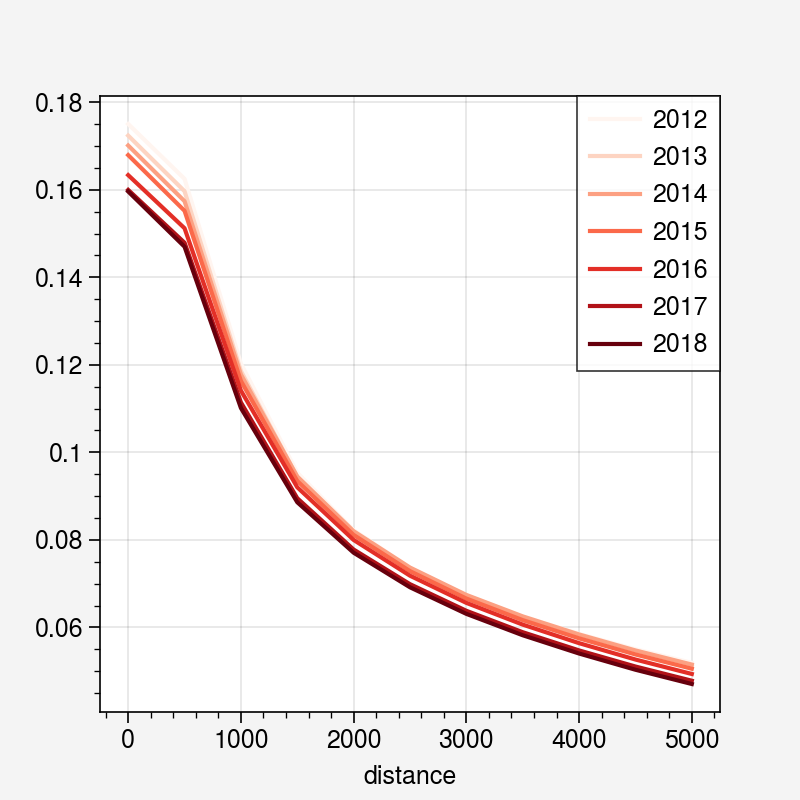

In [ ]:
d.plot(cmap='Reds')

Entropy is falling the fastest at small scales (the gap is wider on the left-hand side of the graph than the right-hand side)

In [ ]:
iso = segdyn.spacetime_dyn(dc, singlegroup.Isolation, group_pop_var='very_high_inc', total_pop_var='total', distances=list(range(500,5500,500)))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<AxesSubplot:xlabel='distance'>

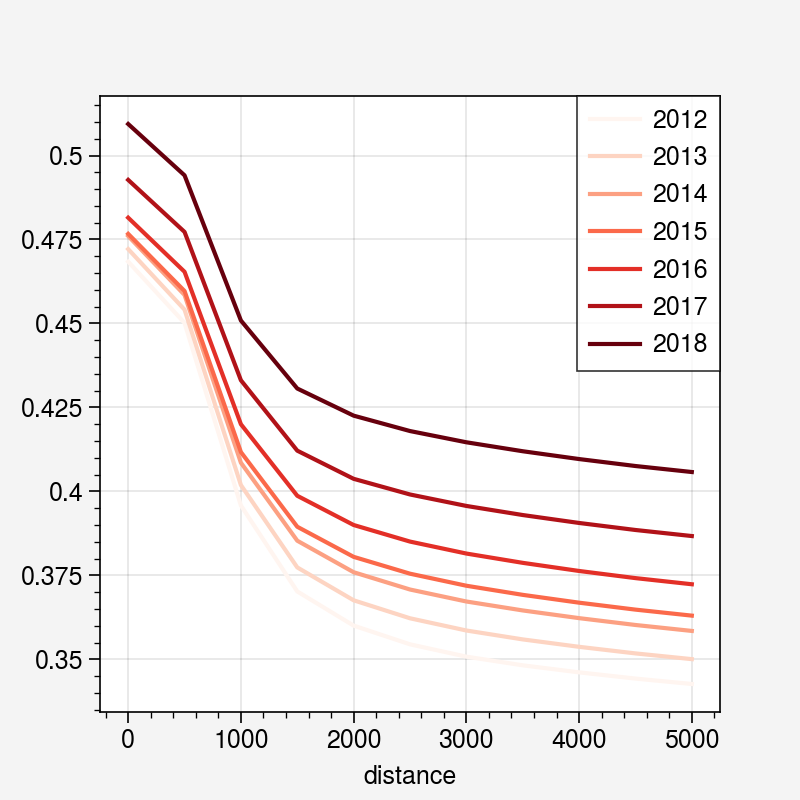

In [ ]:
iso.plot(cmap='Reds')

Isolation is growing the fastest at large scales (the gap is wider with larger distances on the right)

In [ ]:
from geosnap.visualize import animate_timeseries

In [ ]:
animate_timeseries(dc, 'share_very_high_inc', filename='figs/dc_high_inc_change.gif', fps=1.5)

In [ ]:
from IPython.display import Image

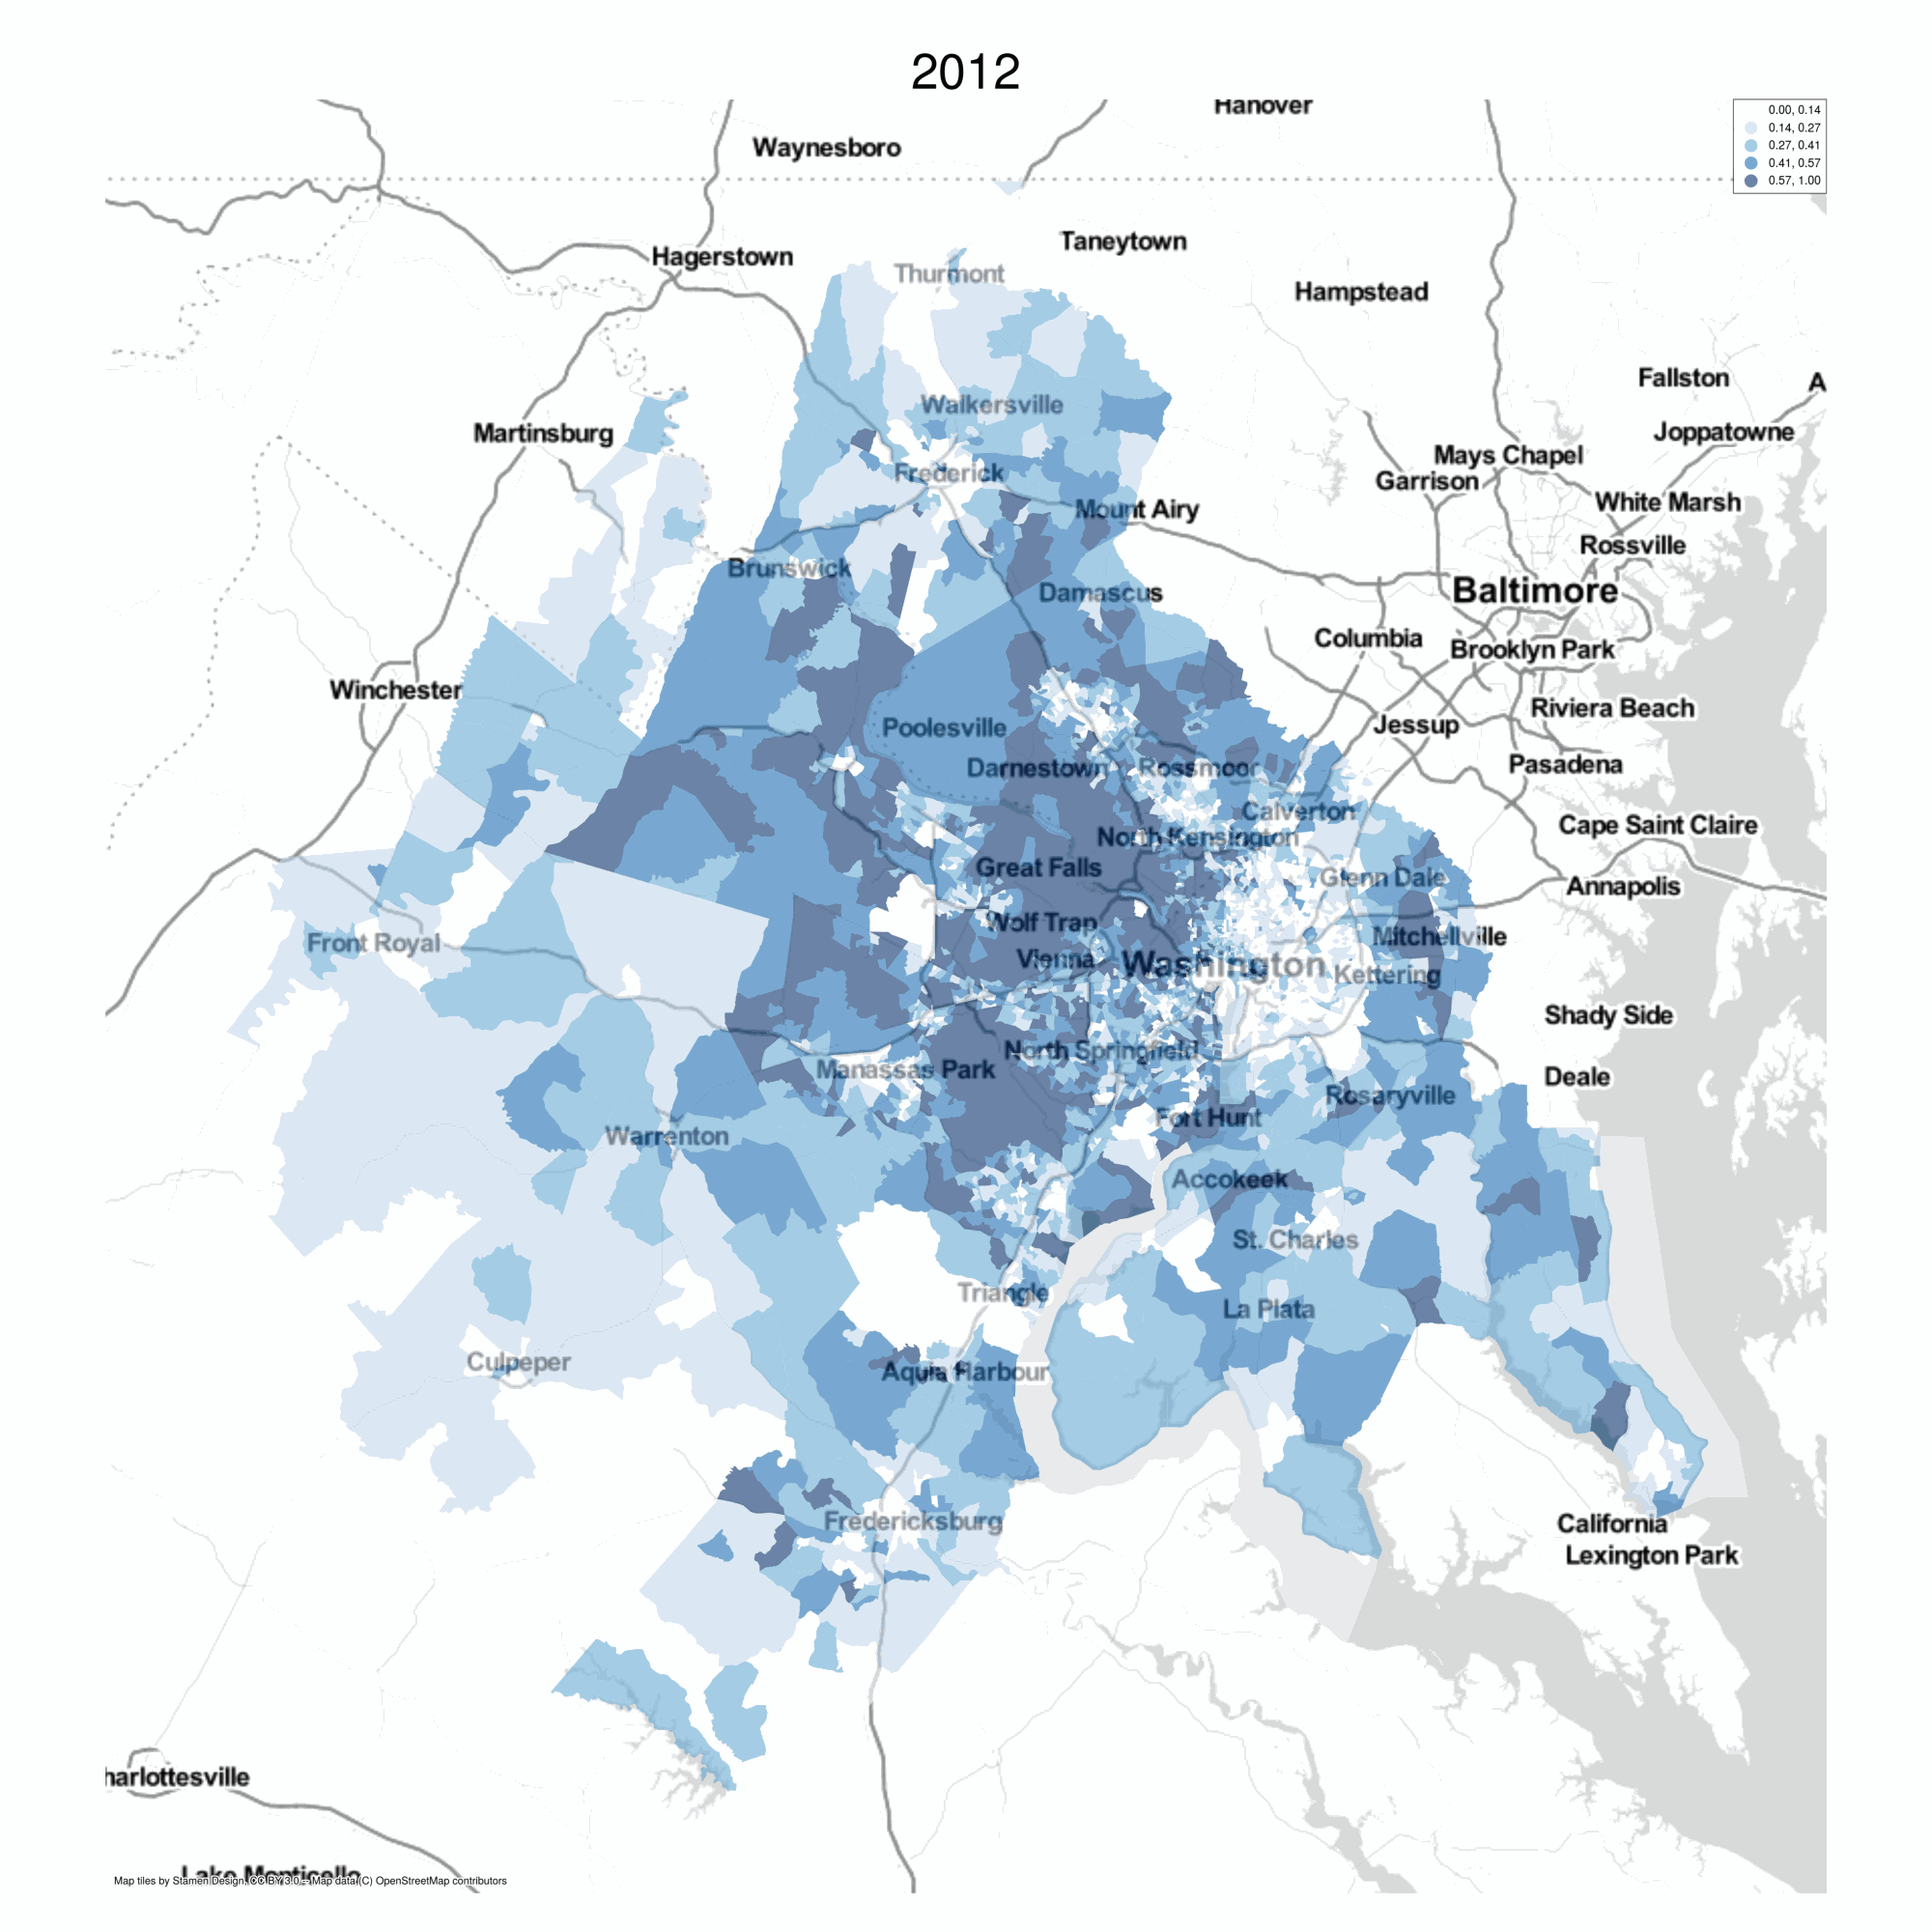

In [ ]:
Image('figs/dc_high_inc_change.gif',width=800)

The story in DC is one of increasing isolation by the affluent at large spatial scales. 

By many metrics, the region appears to be becoming *less* segregated by income over time, but that increase in evenness is largely due to the entire region getting richer. By contrast, looking at the exposure dimension shows that the residents with the highest incomes spend increasingly less time in environments with other income groups, and that change is happening quickest at large spatial scales. Put differently, we see a trend akin to agglomeration, whereby the large wealthy enclaves are becoming moreso

(remember this is example makes some *very* liberal assumptions about the input data, so the "takeaways" here are just for illustration)

## Using geosnap as a Dashboard Engine

The Python dashboarding ecosystem is evolving quickly, so we won't opine on which platform or toolset is best. But if you have a personal favorite, `geosnap` is performant to power an urban analytics dashboard on-the-fly. The example below wraps a simple streamlit interface around the workflow above that lets us explore *every* metro region quickly

**example**:  <https://github.com/knaaptime/incseg_app>

![](https://github.com/knaaptime/incseg_app/raw/main/data/incseg_app_demo.png)

## Demo